In [1]:
#First we will import all the important modules needed
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\synda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\synda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\synda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#First we will get out dataset using pandas
spam_df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Here we will just leave the columns which are needed
spam_df = spam_df[['v1','v2']]

In [5]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Here this shows the shape of our dataset
spam_df.shape

(5572, 2)

In [7]:
#Now here we will apply Stemming and remove all the stopwords from our messages dataset
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam_df)):
    review = re.sub('[^a-zA-Z]',' ', spam_df['v2'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
#This is our corpus after stemming and removing stopwords
corpus[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [9]:
#Now here we will decide our features in which we want to make for converting our messsages into vectors
#Also we do the encoding of our spam and ham row to integer for proper computation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(spam_df['v1'])

In [10]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
#For our target row we will select the spam column
y = y.iloc[:,1].values

In [12]:
#Now for model building we will divide our dataset into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
#Now we will import Naive bayes as its MultinomialNB is efficient for classification with decrete features
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [14]:
#Now we will make an confusion matrix for visual representation of our predictions
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [15]:
y_pred = spam_detect_model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [17]:
unique_labels(y_pred)

array([0, 1], dtype=uint8)

In [18]:
#This funcution will make our confusion matrix of the predictions
def plot(y_test, y_pred):
    labels = unique_labels(y_pred)
    column = [f'Predcited {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=column, index=indices)

    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<AxesSubplot:>

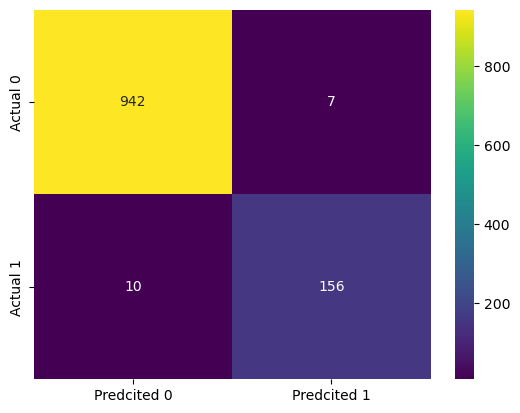

In [19]:
plot(y_test, y_pred)

In [20]:
#Now we will form our classification report which will contain f1-score, support and accuracy
from sklearn.metrics import accuracy_score,classification_report

In [21]:
accuracy_score(y_test,y_pred)

0.9847533632286996

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.94      0.95       166

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

